In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digitrecognizer/sample_submission.csv
/kaggle/input/digitrecognizer/train.csv
/kaggle/input/digitrecognizer/test.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../input/digitrecognizer/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
X = df.drop(['label'], axis = 1)

In [7]:
X.shape

(42000, 784)

In [8]:
y = df['label']

In [9]:
X.shape

(42000, 784)

In [10]:
X = X.values.reshape(42000, 28, 28)

In [11]:
X.shape

(42000, 28, 28)

In [12]:
y.shape

(42000,)

In [13]:
single_image = X[0]

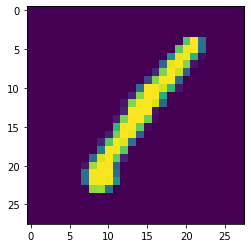

In [14]:
plt.imshow(single_image)

In [15]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [16]:
y.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [17]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y.shape

(42000,)

In [20]:
y = y.values.reshape(42000, 1)

In [21]:
y.shape

(42000, 1)

In [22]:
y[0]

array([1])

In [23]:
y_example = to_categorical(y[0: 10])

In [24]:
y_example

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y = to_categorical(y)

In [26]:
y.shape

(42000, 10)

In [27]:
single_image.max()

255

In [28]:
single_image.min()

0

In [29]:
X[0:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [30]:
X = X.reshape(42000, 28, 28, 1)

In [31]:
y.shape

(42000, 10)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()
model.add(Conv2D(filters = 50, kernel_size = (4 ,4), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 50)        850       
_________________________________________________________________
flatten (Flatten)            (None, 31250)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4000128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 4,002,268
Trainable params: 4,002,268
Non-trainable params: 0
_________________________________________________________________


In [38]:
X.shape

(42000, 28, 28, 1)

In [40]:
y.shape

(42000, 10)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [45]:
X_train.shape

(33600, 28, 28, 1)

In [47]:
model.fit(X_train, y_train, validation_data = (X_cv, y_cv), epochs = 20)

Epoch 1/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0101 - accuracy: 0.9979 - val_loss: 0.0702 - val_accuracy: 0.9906
Epoch 2/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0209 - accuracy: 0.9971 - val_loss: 0.0873 - val_accuracy: 0.9914
Epoch 3/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0179 - accuracy: 0.9973 - val_loss: 0.1018 - val_accuracy: 0.9898
Epoch 4/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0123 - accuracy: 0.9981 - val_loss: 0.0758 - val_accuracy: 0.9906
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0116 - accuracy: 0.9981 - val_loss: 0.0893 - val_accuracy: 0.9915
Epoch 6/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0123 - accuracy: 0.9984 - val_loss: 0.1363 - val_accuracy: 0.9898
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0156 - accuracy: 0.9980 - val_loss: 0.0909 - val_accuracy:

In [48]:
df_test = pd.read_csv('../input/digitrecognizer/test.csv')

In [49]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_test.shape

(28000, 784)

In [53]:
X_test = df_test.values.reshape(28000, 28, 28, 1)

In [55]:
X_test.shape

(28000, 28, 28, 1)

In [57]:
predictions = model.predict(X_test)

In [59]:
predictions.shape

(28000, 10)

In [64]:
predictions_converted = []
for i in range(len(predictions)):
    predictions_converted.append(np.argmax(predictions[i]))

In [67]:
predictions_converted[0 : 5]

[2, 0, 9, 9, 3]

In [69]:
sample_predictions = pd.read_csv('../input/digitrecognizer/sample_submission.csv')

In [71]:
sample_predictions.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [74]:
dictionary = {1: 2}

In [84]:
sample_predictions.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [85]:
len(sample_predictions)

28000

In [80]:
sample_predictions.columns

Index(['ImageId', 'Label'], dtype='object')

In [87]:
Image_id = np.arange(1, len(sample_predictions) + 1)

In [89]:
predictions_converted[0: 2]

[2, 0]

In [90]:
output_dictionary = {sample_predictions.columns[0]: Image_id, sample_predictions.columns[1]: predictions_converted}

In [93]:
final_dataframe = pd.DataFrame(output_dictionary)

In [105]:
final_dataframe.to_csv('input\final output.csv', index = False)